# Run an OpenCilk benchmark

+ `run_cilk_test.sh` will default to running `OpenCilk/tutorial/qsort 1000` 100 times with 4 `CILK_WORKERS`.

+ `sbatch` will cause this script to be run on a worker node of the cluster.

+ `run_cilk_tests.csv` is created as a list of the 100 run times.

In [1]:
!hostname

mgmt-sfgary-awstest-00066


In [2]:
!sbatch --output=tmp.log run_cilk_tests.sh qsort 100 1000 4

#!sbatch --output=tmp.log run_cilk_tests.sh qsort 100 100000000 64

Submitted batch job 15


# Plot the results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sorted run times')

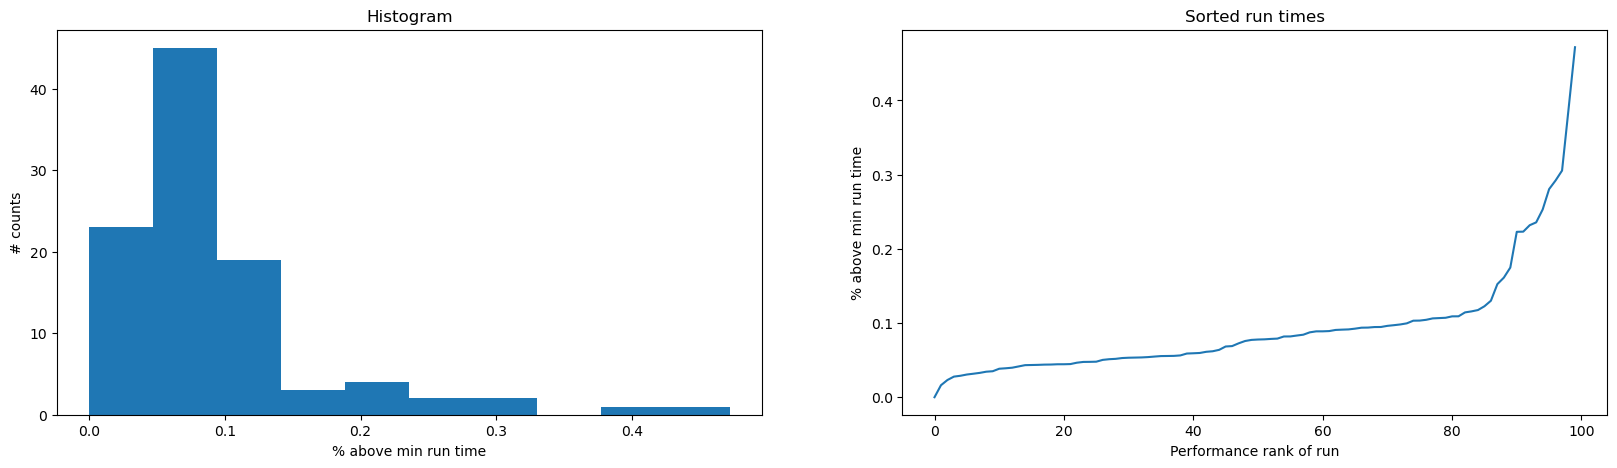

In [4]:
run_times=pd.read_csv('run_cilk_tests.csv',names=['Run time'])

percent_above_min = (run_times - run_times.min())/run_times

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,5))
ax0.hist(percent_above_min)
ax0.set_xlabel('% above min run time')
ax0.set_ylabel('# counts')
ax0.set_title('Histogram')

ax1.plot(percent_above_min.sort_values(by="Run time",ascending=True,ignore_index=True))
ax1.set_xlabel('Performance rank of run')
ax1.set_ylabel('% above min run time')
ax1.set_title('Sorted run times')

# Clean up

In [5]:
!rm -rf tmp.log run_cilk_tests.log run_cilk_tests.csv tutorial/